[[66.05263157894737, 73.46315789473684, 73.25263157894737],
 [70.15625, 84.109375, 70.09375]]

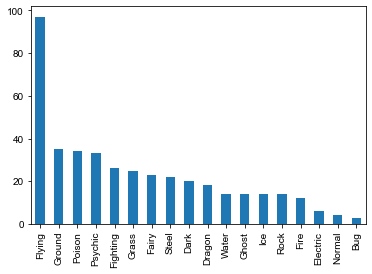

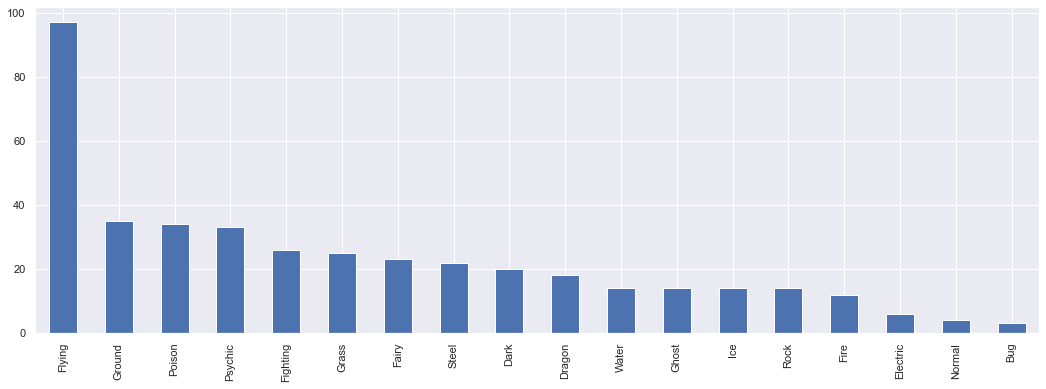

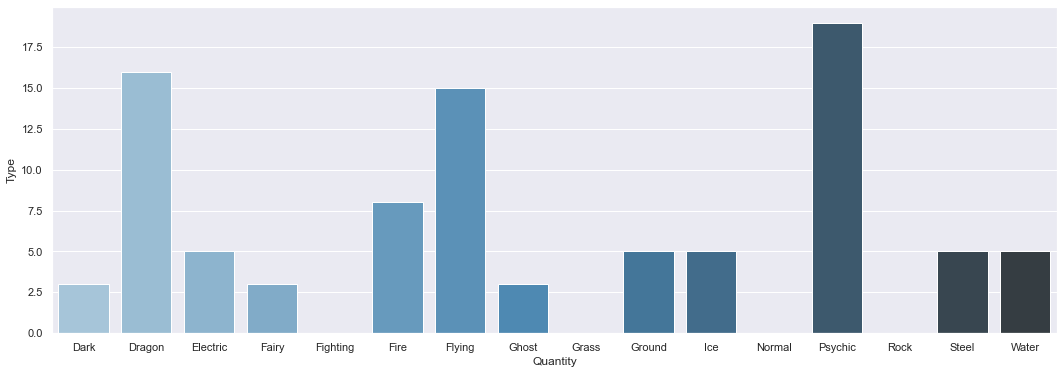

In [1]:

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

from matplotlib import pyplot as pltt


pokemon_url='https://raw.githubusercontent.com/rpdieego/IndigoTortoise-pkmn-notebooks/master/datasets_2619_4359_pokemon.csv'

combats_url='https://raw.githubusercontent.com/rpdieego/IndigoTortoise-pkmn-notebooks/master/datasets_2619_4359_combats.csv'

pokemon_df=pd.read_csv(pokemon_url)

combats_df=pd.read_csv(combats_url)
##find missing values in pokemon_df

pokemon_df.isnull().sum()

##386 satırın Type 2 kolon değeri Null

##Type 2 kolon değeri null olan kayitlari getirelim

pokemon_df[pokemon_df['Type 2'].isnull()]

##pokemonların yüzde kaçının type 2 değerine sahip olduğuna bakalım

CountOfPokemonsHaveType2=pokemon_df[pokemon_df['Type 2'].isnull()==False].shape[0]
CountOfPokemonsNotHaveType2=pokemon_df[pokemon_df['Type 2'].isnull()==True].shape[0]
CountOfPokemonsHaveType2/(CountOfPokemonsHaveType2+CountOfPokemonsNotHaveType2)

##Type 2 kolonunda yer alan değerlerin  sayılarını bulalım..
Type2Counts=pokemon_df['Type 2'].value_counts()

##Type 2 kolon değer adetlerine göre bar grafiği çizdirelim
Type2Counts.plot.bar()


##input olarak verilen kolonların ortalamalarını hesaplayıp dönen fonksiyon yazalım..
def CalculateAvgOfColumns(column_list):

  avg_list = []
  for stat in column_list:
    avg = pokemon_df[stat].mean()
    avg_list.append(avg)

  return avg_list


ColList=['Attack','Defense','HP']
hs=CalculateAvgOfColumns(ColList)
hs


##Group By örnekleri Type 1 değerine göre attack değerlerinin ortlaması:

pokemon_df.groupby(by='Type 1')['Attack'].mean()

pokemon_df
combats_df
## 1 numaralı pokemonun kazandığı mücadelelerin sayisini bulalım

Kazanan=pokemon_df.merge(combats_df,how='inner',left_on='#',right_on='First_pokemon')
Kazanan[(Kazanan['First_pokemon']==1) & (Kazanan['Winner']==1)]['Name'].count()

##Legendary değeri False olup kazananın ilk pokemon olduğu durumları listeleyelim

Kazanan[(Kazanan['Legendary']==False) & (Kazanan['First_pokemon']==Kazanan['Winner'])]


type2cnt=pokemon_df['Type 2'].value_counts()

sns.set()

pltt.figure(figsize=(18,6))

pltt.title='Per Type 2'

type2cnt.plot.bar()


##Legendary flag Y olan pokemonlarda en çok görülen Type 1 ve Type 2 değerlerini inceleyelim


lgd_type1_cnt=pokemon_df[pokemon_df['Legendary']==True]['Type 1'].value_counts()

lgd_type2_cnt=pokemon_df[pokemon_df['Legendary']==True]['Type 2'].value_counts()

lgd_type_total=lgd_type1_cnt+lgd_type2_cnt

lgd_type_total.sort_values(ascending=False)


pltt.figure(figsize=(18,6))

pltt.xlabel('Quantity')
pltt.ylabel('Type')
pltt.title='Most Common Legendary Pokemons'

ax=sns.barplot(palette='Blues_d',y=lgd_type_total.values,x=lgd_type_total.index)


def avarage_stats(stat_list):

    avg_stats_list=[]

    for stat in stat_list:

        avg_stat=pokemon_df[stat].mean()

        avg_stats_list.append(avg_stat)

    return avg_stats_list
#Test avarage_stats founction
# stat_list=['HP','Attack','Defense','Speed']

# hs=avarage_stats(stat_list)

# hs
avgStatus=[]
def average_stats_per_type(types_list,stats_list):

  for t in types_list:

    avgStatusType=[]

    for s in stats_list:

      avgVal=pokemon_df[(pokemon_df['Type 1']==t) | (pokemon_df['Type 2']==t) ][s].mean()

      avgStatusType.append(avgVal)
    
    avgStatus.append(avgStatusType)

  return avgStatus







